In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.distributions.empirical_distribution import ECDF
import datetime
import seaborn as sns

import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
plt.style.use(['fast', 'dark_background'])

In [2]:
merge = pd.read_csv('allstore.csv')
merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Unnamed: 0,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,0,1,1,c,a,1270,9,2008,0,x,x,x
1,1,4,30/07/2015,5020,546,1,1,0,1,1,c,a,1270,9,2008,0,x,x,x
2,1,3,29/07/2015,4782,523,1,1,0,1,1,c,a,1270,9,2008,0,x,x,x
3,1,2,28/07/2015,5011,560,1,1,0,1,1,c,a,1270,9,2008,0,x,x,x
4,1,1,27/07/2015,6102,612,1,1,0,1,1,c,a,1270,9,2008,0,x,x,x


In [3]:
merge['Date'] = pd.to_datetime(merge['Date'])
merge.set_index('Date', inplace = True)

merge['year'] = merge.index.year
merge['month'] = merge.index.month
merge['day'] = merge.index.day
merge['week_of_year'] = merge.index.weekofyear

In [4]:
merge['day_of_year'] = merge.index.dayofyear
merge['day_of_week'] = merge.index.dayofweek
merge.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Unnamed: 0,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,week_of_year,day_of_year,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,1,c,...,0,x,x,x,2015,7,31,31,212,4
2015-07-30,1,4,5020,546,1,1,0,1,1,c,...,0,x,x,x,2015,7,30,31,211,3
2015-07-29,1,3,4782,523,1,1,0,1,1,c,...,0,x,x,x,2015,7,29,31,210,2
2015-07-28,1,2,5011,560,1,1,0,1,1,c,...,0,x,x,x,2015,7,28,31,209,1
2015-07-27,1,1,6102,612,1,1,0,1,1,c,...,0,x,x,x,2015,7,27,31,208,0


### Empirical distribution function

Text(0.5, 0, 'Customers')

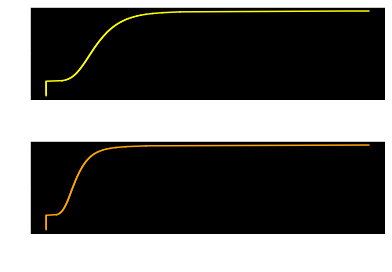

In [5]:
figure, axes = plt.subplots(nrows = 2, ncols = 2)
figure.tight_layout(pad = 2.0)

plt.subplot(211)
cdf = ECDF(merge['Sales'])
plt.plot(cdf.x, cdf.y, 
        label = 'statsmodel', color = 'yellow');
plt.xlabel('Sales')

plt.subplot(212)
cdf = ECDF(merge['Customers'])
plt.plot(cdf.x, cdf.y, 
        label = 'statsmodel', color = 'orange');
plt.xlabel('Customers')

### >50% of Stores sold less than 10,000
### About 60% of the time, customers did not exceed 1000

In [6]:
merge.groupby('Store')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
1,942.0,3945.704883,2015.417840,0.0,3588.25,4373.5,5220.00,9528.0
2,942.0,4122.991507,2363.628674,0.0,2806.75,4395.5,5804.50,10682.0
3,942.0,5741.253715,3298.782559,0.0,4247.50,5892.0,8152.75,15689.0
4,942.0,8021.769639,4012.592818,0.0,7322.50,9062.0,10281.00,17412.0
5,942.0,3867.110403,2389.609890,0.0,2027.00,4180.0,5419.25,11692.0
6,942.0,4562.375796,2527.359298,0.0,3408.75,5012.5,6333.50,11139.0
7,942.0,7356.902335,3969.299824,0.0,5947.25,7928.5,9785.75,18413.0
8,942.0,4610.251592,2696.883772,0.0,2916.75,4919.0,6558.00,10971.0
9,942.0,5426.816348,2891.687966,0.0,4765.50,5904.5,7086.75,13457.0


C:\Users\ke117\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



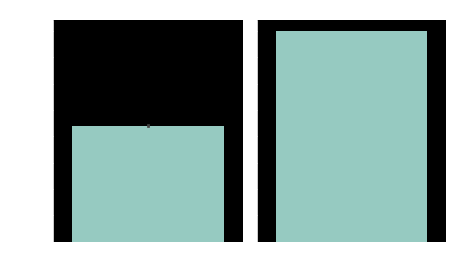

In [7]:
g = sns.FacetGrid(merge, 
                 col = 'Promo', 
                 height = 4, aspect = .8)

g.map(sns.barplot, 'Promo', 'Sales');

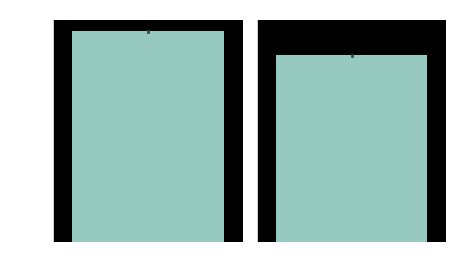

In [8]:
g = sns.FacetGrid(merge, 
                 col = 'Promo2', 
                 height = 4, aspect = .8)

g.map(sns.barplot, 'Promo2', 'Sales');

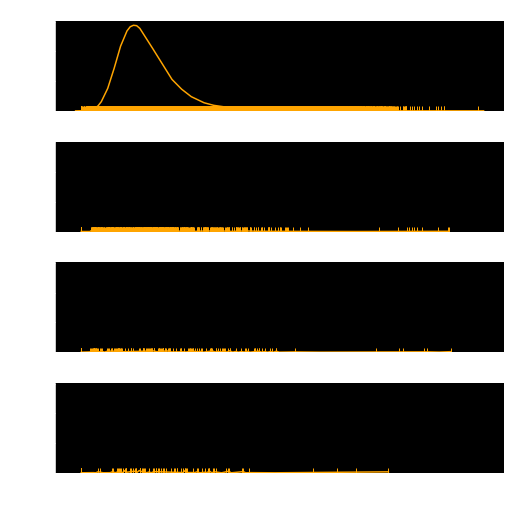

In [9]:
g = sns.FacetGrid(merge, 
                 row = 'StateHoliday',
                 height = 1.8,
                 aspect = 4)

g.map(sns.distplot, 'Sales', 
     hist = False, rug = True, color = 'orange');

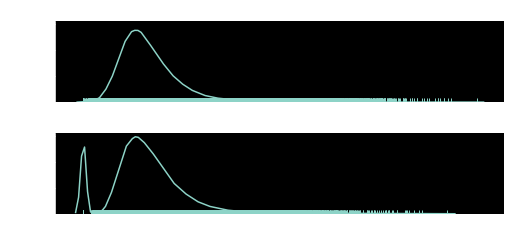

In [10]:
g = sns.FacetGrid(merge, 
                 row = 'SchoolHoliday',
                 height = 1.8,
                 aspect = 4)

g.map(sns.distplot, 'Sales', 
     hist = False, rug = True);

C:\Users\ke117\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



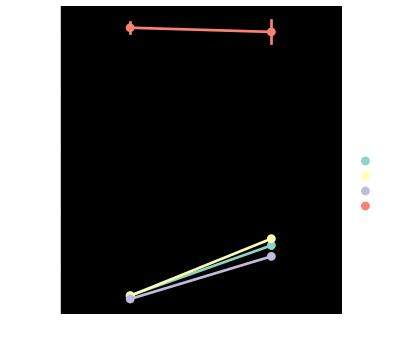

In [11]:
sns.factorplot(data = merge,
              x = 'SchoolHoliday',
              y = 'Sales',
              hue = 'StoreType');

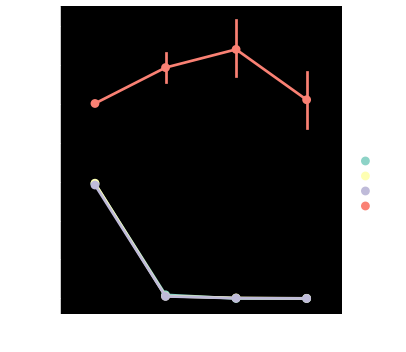

In [12]:
sns.factorplot(data = merge,
              x = 'StateHoliday',
              y = 'Sales',
              hue = 'StoreType');

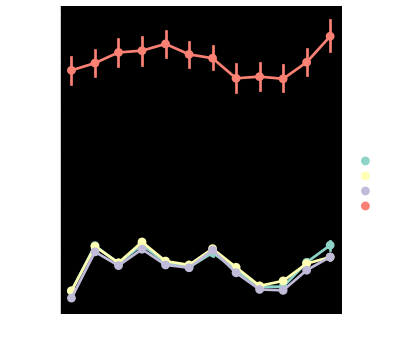

In [13]:
sns.factorplot(data = merge,
              x = 'month',
              y = 'Sales',
              hue = 'StoreType');

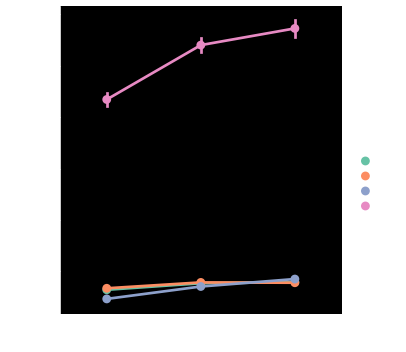

In [14]:
sns.factorplot(data = merge,
              x = 'year',
              y = 'Sales',
              hue = 'StoreType',
              palette = 'Set2');

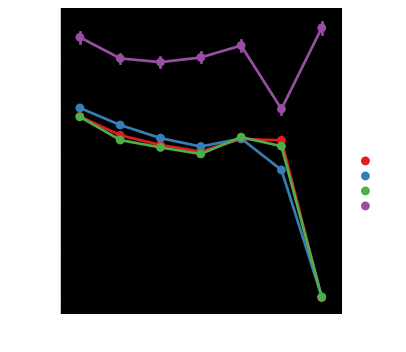

In [15]:
sns.factorplot(data = merge,
              x = 'DayOfWeek',
              y = 'Sales',
              hue = 'StoreType',
              palette = 'Set1')

### Type B outperforms others

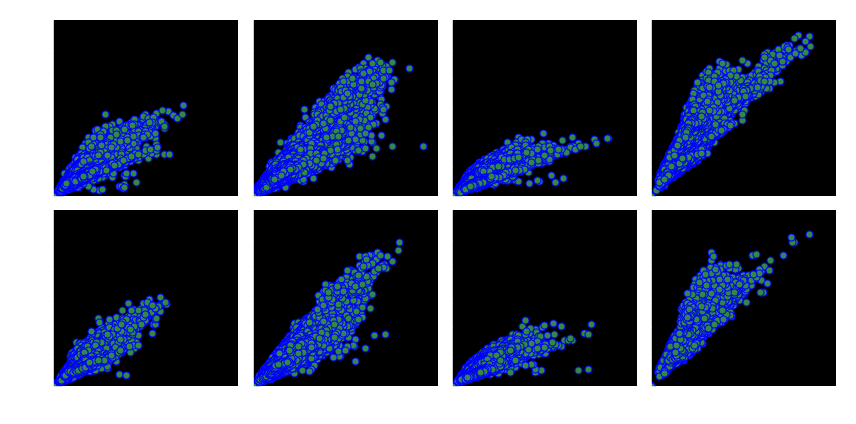

In [16]:
g = sns.FacetGrid(merge, col = 'StoreType', row = 'SchoolHoliday',
                margin_titles = True, height = 3)

g.map(plt.scatter, 'Sales', 'Customers', color = '#338844',
      edgecolors = 'blue', s = 50, lw = 1)

g.set(xlim = (0, 45000),
      ylim = (0, 6000))

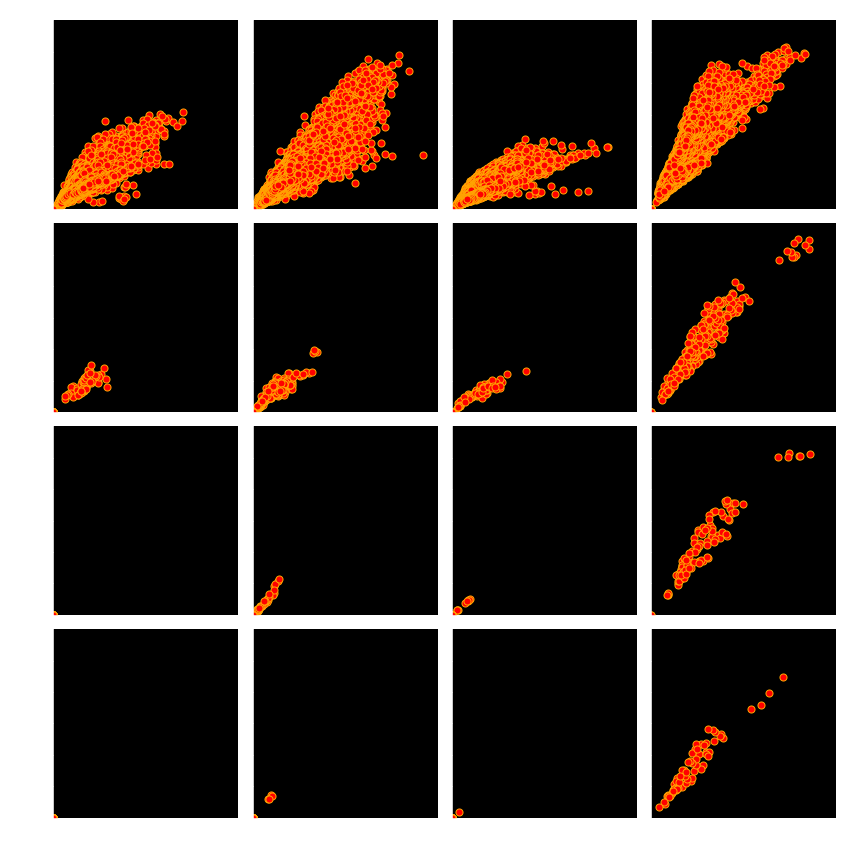

In [17]:
g = sns.FacetGrid(merge, col = 'StoreType', row = 'StateHoliday',
                margin_titles = True, height = 3)

g.map(plt.scatter, 'Sales', 'Customers', color = 'red',
      edgecolors = 'orange', s = 50, lw = 1)

g.set(xlim = (0, 45000),
      ylim = (0, 6000))

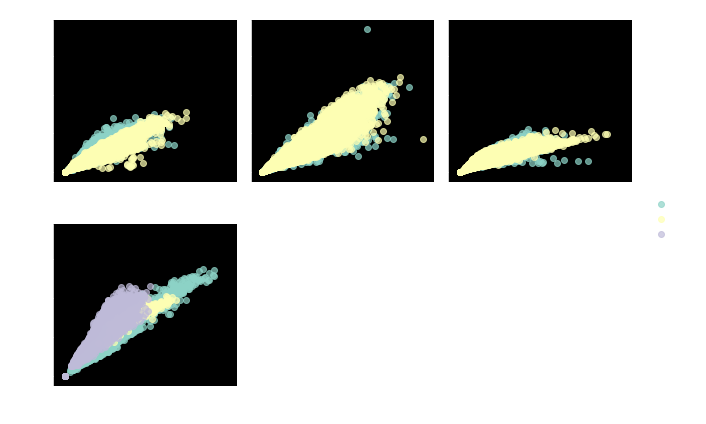

In [18]:
g = sns.FacetGrid(merge, col = "StoreType", hue = "Assortment",
                  margin_titles = True, col_wrap=3)

g.map(plt.scatter, 'Sales', 'Customers', alpha=.7)
g.add_legend()

### Type b contains higher proportions of assortment b 

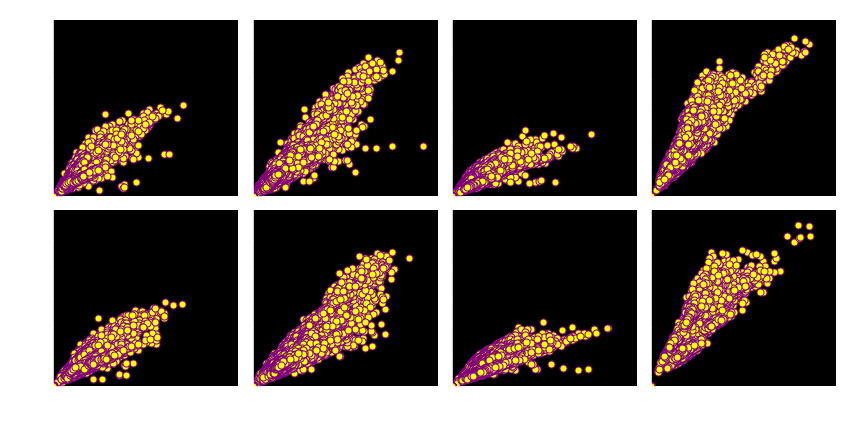

In [19]:
g = sns.FacetGrid(merge, col = 'StoreType', row = 'Promo',
                margin_titles = True, height = 3)

g.map(plt.scatter, 'Sales', 'Customers', color = 'yellow',
      edgecolors = 'purple', s = 50, lw = 1)

g.set(xlim = (0, 45000),
      ylim = (0, 6000))

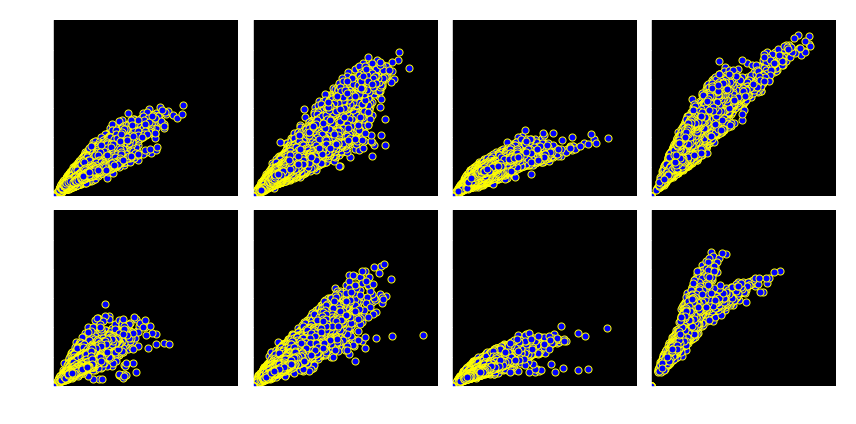

In [20]:
g = sns.FacetGrid(merge, col = 'StoreType', row = 'Promo2',
                margin_titles = True, height = 3)

g.map(plt.scatter, 'Sales', 'Customers', color = 'blue',
      edgecolors = 'yellow', s = 50, lw = 1)

g.set(xlim = (0, 45000),
      ylim = (0, 6000))

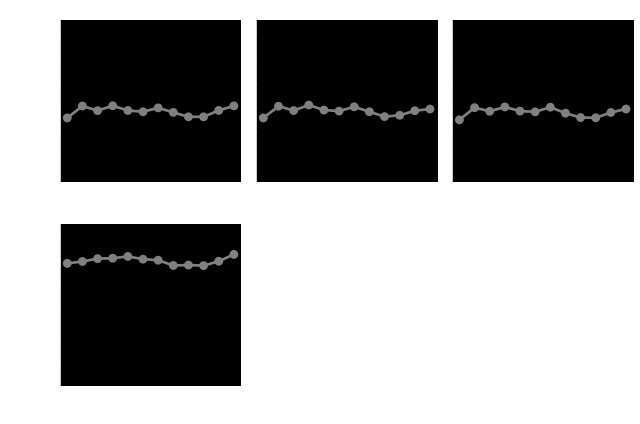

In [21]:
g = sns.FacetGrid(merge, col= "StoreType", col_wrap=3, height=3, ylim=(0, 13000))
g.map(sns.pointplot, "month", "Sales",
      color=".5", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

### Each type has some seasonality (Dec)

### Type B has more obvious seasonal patterns or peak seasons (summer / back to school / christmas)

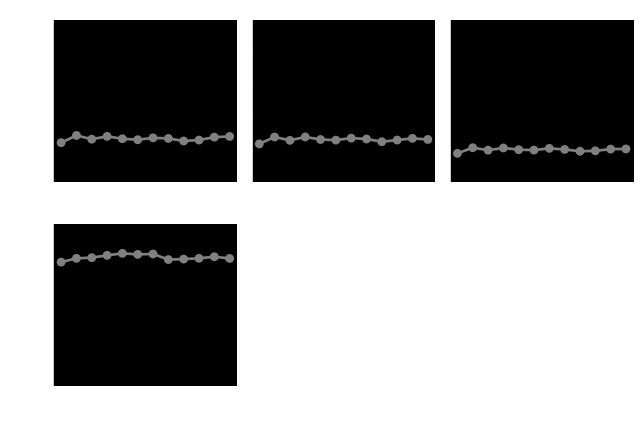

In [22]:
g = sns.FacetGrid(merge, col= "StoreType", col_wrap=3, height=3, ylim=(0, 2500))
g.map(sns.pointplot, "month", "Customers",
      color=".5", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

### Customer count matches seasonality pattern 

# Prophet 

### - forecast for 1 store, type B

In [23]:
df_b = merge[(merge.StoreType == 'b')]
df_b.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Unnamed: 0,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,week_of_year,day_of_year,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,85,5,7791,971,1,1,0,1,85,b,...,0,x,x,x,2015,7,31,31,212,4
2015-07-30,85,4,7187,1000,1,1,0,1,85,b,...,0,x,x,x,2015,7,30,31,211,3
2015-07-29,85,3,7719,889,1,1,0,1,85,b,...,0,x,x,x,2015,7,29,31,210,2
2015-07-28,85,2,7533,920,1,1,0,1,85,b,...,0,x,x,x,2015,7,28,31,209,1
2015-07-27,85,1,7788,956,1,1,0,1,85,b,...,0,x,x,x,2015,7,27,31,208,0


In [24]:
df = df_b[(df_b.Store == 85)].loc[:, ['Sales', 'Customers']]
df.reset_index(level = 0, 
                inplace = True)

df['Date'] = pd.to_datetime(df['Date'])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ke117\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



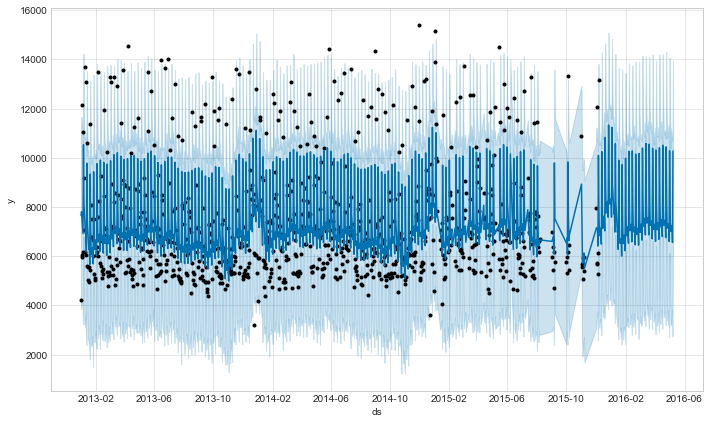

In [26]:
plt.style.use(['fast', 'seaborn-whitegrid'])
s85 = df[['Date', 'Sales']].rename(columns = {'Date':'ds', 
                                              'Sales':'y'})

model = Prophet(interval_width = 0.95)
model.fit(s85)
future_df = model.make_future_dataframe(periods = 153, freq = 'D') # 01/08/2015 - 31/12/2015
forecast = model.predict(future_df)

model.plot(forecast);

### Seasonality captured 

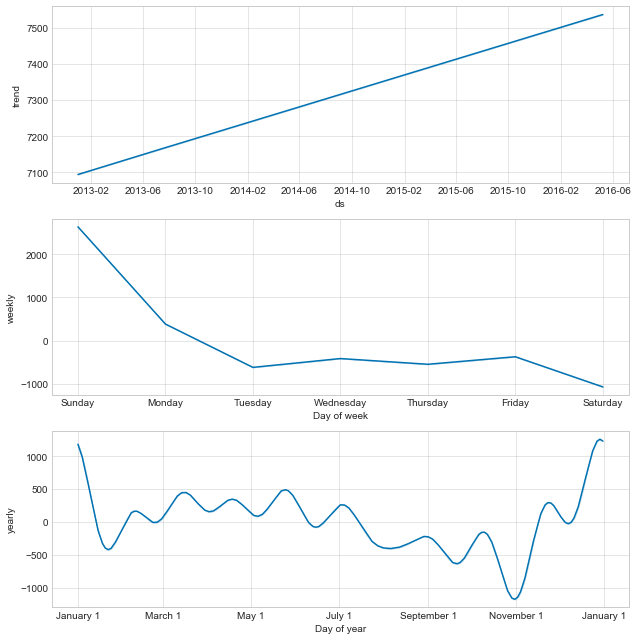

In [28]:
model.plot_components(forecast);

In [27]:
metric_df = forecast.set_index('ds')[['yhat']].join(s85.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(sqrt(error)))

The RMSE is 1916.8781311474345
